<a href="https://colab.research.google.com/github/GreeneumNetwork/DEDA-SoSe2021/blob/main/deda_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Root Mean Square Error:

0.5014036650084739


Text(0.5, 0, 'Time')

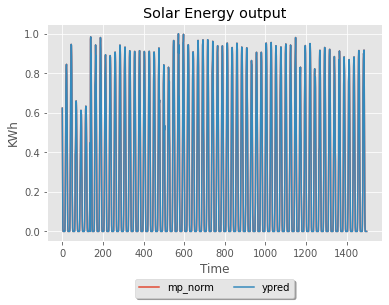

In [ ]:
import math
from matplotlib import pyplot as plt
from matplotlib import style
#from PyEMD import EMD
#from PyEMD import EMD, Visualisation

#
import pandas as pd
import numpy as np

from keras.layers.recurrent import LSTM
from keras.models import Sequential
from keras.layers.core import Activation, Dense, Dropout
model = Sequential()

style.use('ggplot')

df1 = ["timestamp","max_power"]

#data=pd.read_csv(r/maabarot_johnson_from_2010_04_22_to_2020_12_31.csv', usecols=df1)
data=pd.read_csv(r'/maabarot_johnson_from_2010_04_22_to_2020_12_31a.csv', usecols=df1)

# 
max_power_complete=data['max_power']
time_complete=data['timestamp']

#max_power = list(islice(max_power_complete, 1500))
#time = list(islice(time_complete, 1500))

array1 = np.array(max_power_complete)
max_power=array1[1000:2500:1]

array2 = np.array(time_complete)
time=array2[1000:2500:1]

mp_max, mp_min = max(max_power), min(max_power)
mp_norm = (max_power - mp_min)/(mp_max - mp_min)

#emd = EMD()
#IMFs = emd(mp_norm)
#plt.plot(IMFs)

#model.add(LSTM(units=nb_neural, return_sequences=True, input_shape=
#(Xtrain.shape[1], 1)))

#model.add(LSTM(units=nb_neural, return_sequences=True, input_shape=
#(Xtrain.shape[1], 1)))
#model.compile(loss="mse", optimizer="adam", metrics=[rmse, 'mae',
#Rsquare])

# Fit the LSTM network
#history = model.fit(Xtrain, ytrain, batch_size=batch_size,
#epochs=num_epochs,
#validation_data=(Xval, yval), verbose=2)


ypred = model.predict(mp_norm)


MSE = np.square(np.subtract(mp_norm,ypred)).mean() 
RMSE = math.sqrt(MSE)
print("Root Mean Square Error:\n")
print(RMSE)

#plt.plot(time,max_power)
#plt.plot(time,mp_norm,time,ypred)
#plt.legend(np_norm,ypred)
#myaxes=fig.add.axes([0.1,0.1,1.6,1.6])
#myaxes.plot=year(timestamp, max_power)
plt.show()
line_up, = plt.plot(mp_norm, label='mp_norm')
line_down, = plt.plot(ypred, label='ypred')
#plt.legend(handles=[line_up, line_down])

plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.15),
          fancybox=True, shadow=True, ncol=5)


plt.title('Solar Energy output')
plt.ylabel('KWh')
plt.xlabel('Time')
#plt.show()

TypeError: ignored

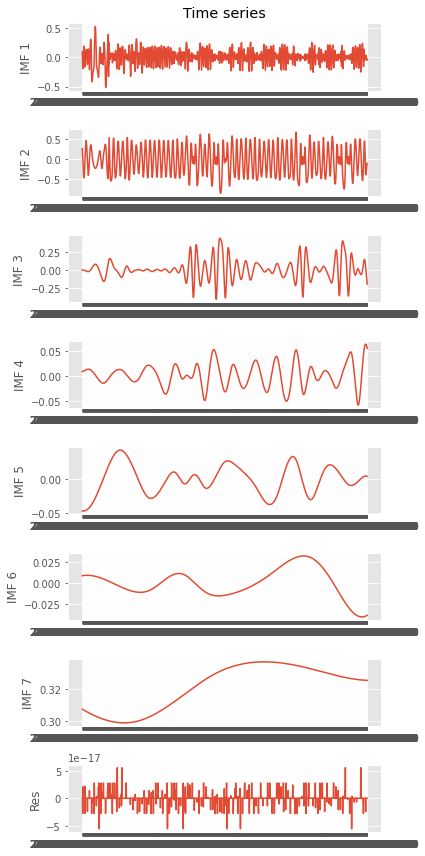

In [ ]:
import numpy as np
from PyEMD import EMD, Visualisation

t = time
S = mp_norm

# Extract imfs and residue
# In case of EMD
emd = EMD()
emd.emd(S)
imfs, res = emd.get_imfs_and_residue()

# In general:
#components = EEMD()(S)
#imfs, res = components[:-1], components[-1]

vis = Visualisation()
vis.plot_imfs(imfs=imfs, residue=res, t=t, include_residue=True)
vis.plot_instant_freq(t, imfs=imfs)
vis.show()

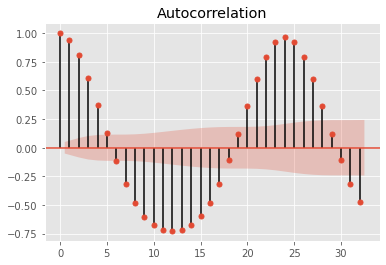

In [ ]:
from pandas import read_csv
from matplotlib import pyplot
from statsmodels.graphics.tsaplots import plot_acf
series =read_csv(r'/maabarot_johnson_from_2010_04_22_to_2020_12_31a.csv', usecols=df1)
max_power_complete=data['max_power']
mp_max, mp_min = max(max_power), min(max_power)
mp_norm = (max_power - mp_min)/(mp_max - mp_min)

#series = read_csv(r/'maabarot_johnson_from_2010_04_22_to_2020_12_31a.csv')
plot_acf(mp_norm)
pyplot.show()


